𝜌_𝑀𝑑𝑀⁄𝑑𝑡 = μ − ε(𝑀 − 𝑀0)

𝜌_𝑀 = 𝜌F𝜌L/(𝜌L+(𝜌F-𝜌L)p)

mu = I-E(F(M0),L(M0))

ε = dE/dM|M=M0

𝜌F=39.5 MJ/kg, 𝜌G = 17.6 MJ/kg, 𝜌P = 19.7 MJ/k

𝜌L = 𝜌P/(1+hP)= 7.6 MJ/kg


In [52]:
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [68]:
A0 = 18
a = 0.9
M0 = 60
m = 9
I0 = 2000
dI = 800
I1 = dI+I0
ai = 248
pi = 0.4356
yi = 5.09
final = 14 #days
r = 0.59
C = -2500

DIT = 0.077*I0
PA = m*M0
RMR = 0.9*(ai*M0**pi-yi*(A0+final/365))
NEAT = r/(1-r)*(DIT+PA+RMR) + C
totalE = DIT+PA+RMR+NEAT


DIT2 = 0.077*I1
PA2 = m*M0
RMR2 = 0.9*(ai*M0**pi-yi*(A0+final/365))
NEAT2 = r/(1-r)*(DIT2+PA2+RMR2) + C
totalE2 = DIT2+PA2+RMR2+NEAT2

# print(PA/totalE0)
# print(NEAT/totalE0)
print("DIT   |   PA   |    RMR     |     NEAT     |    TOTAL: ")
print(round(DIT,3),"\t",round(PA,3),"\t",round(RMR,3),"\t",round(NEAT,3),"\t",round(totalE,3))
print(round(DIT/totalE,3),"\t",round(PA/totalE,3),"\t",round(RMR/totalE,3),"\t\t",round(NEAT/totalE,3),"\t\t",round(totalE/totalE,3))


print("\n\nDIT2   |   PA2   |    RMR2     |     NEAT2     |    TOTAL2: ")
print(round(DIT2,3),"\t",round(PA2,3),"\t",round(RMR2,3),"\t",round(NEAT2,3),"\t",round(totalE2,3))
print(round(DIT2/totalE2,3),"\t",round(PA2/totalE2,3),"\t",round(RMR2/totalE2,3),"\t\t",round(NEAT2/totalE2,3),"\t\t",round(totalE2/totalE2,3))


DIT   |   PA   |    RMR     |     NEAT     |    TOTAL: 
154.0 	 540 	 1245.546 	 291.054 	 2230.6
0.069 	 0.242 	 0.558 		 0.13 		 1.0


DIT2   |   PA2   |    RMR2     |     NEAT2     |    TOTAL2: 
215.6 	 540 	 1245.546 	 379.698 	 2380.844
0.091 	 0.227 	 0.523 		 0.159 		 1.0


In Chow's paper, the lean body mass is 10.4 * log(Fat/D), where D is a free parameter

In Thomas'paper, the lean mass (fat-free mass) for female is 10.4 * ln(Fat) +14.2

Equate these two functions we can get for females, D is about 0.255282

In [69]:
rho_F = 39.5  #MJ/kg
rho_L = 7.6

D = 0.255282 #free param


F0 = 16.5891
L0 = M0-F0
# M0 = F0+L0 #kg

print("M0:",M0)
print("fat ratio:", F0/M0)
alpha = (rho_F/rho_L)*(D*math.exp(L0/10.4)/10.4)
p_ratio = 1/(1+alpha)
rho_M = (rho_F * rho_L) / (rho_L + (rho_F - rho_L)*p_ratio)
print("rhoM: ", rho_M)
print("alpha: ", alpha)
print("p_ratio: ",p_ratio)
# mu = 

M0: 60
fat ratio: 0.276485
rhoM:  27.20757484272372
alpha:  8.290291703803929
p_ratio:  0.10763924663318676


In [70]:
mu1 = I0 - totalE
mu2 = I1 - totalE2
print(mu1,mu2)
#D is between 0.8-0.01

-230.60025087824533 419.1558466827305


In [71]:
dedmM0 = m/(1-r) + (1-a)/(1-r)*ai*pi* M0**(pi-1)
print(dedmM0)
epsilon = dedmM0

24.56438629766412


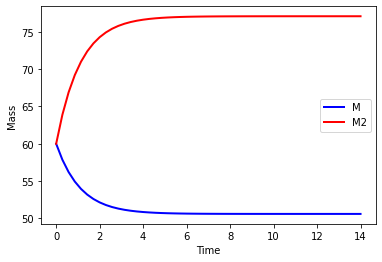

In [72]:
def mass(s,t):
    m0 = s[0]
    m1 = s[1]
    dmdt = (mu1-epsilon*(m0-M0))/rho_M
    dmdt2 = (mu2 - epsilon*(m1-M0))/rho_M
    return [dmdt,dmdt2]

t = np.linspace(0,14)
s0 = [60,60]
s = odeint(mass,s0,t)

plt.plot(t,s[:,0],'b-', linewidth=2.0)
plt.plot(t,s[:,1],'r-', linewidth=2.0)


plt.xlabel("Time")
plt.ylabel("Mass")
plt.legend(["M","M2"])

plt.show()



